In [1]:
#libraries
import numpy as np 
import pandas as pd

import random

#preproccesing
from sklearn.metrics import classification_report,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier

# visulization
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

neural network using sklearn

In [2]:
class NeuralNetwork:
    def __init__(self, learning_rate, train,hidden_layers):
        self.train=train
        self.clf=MLPClassifier(solver='lbfgs', alpha=learning_rate,hidden_layer_sizes=hidden_layers, random_state=1)
        
    def fit(self):
        train_x=self.train[["x","y"]]
        train_y=self.train[["value"]]
        self.clf.fit(train_x,train_y)
        
    def predict(self, test):
        test_x=test[["x","y"]]
        predicted=self.clf.predict(test_x)
        test['pred']=predicted
        return predicted
    
    def score(self, test, predicted):
        i=0
        count=0
        for index, row in test.iterrows():
            if row["value"]==predicted[i]:
                count +=1
            i+=1
        return round(count/i, 4)
   
     #def lookinlayer(self,data,lastlayers,weight,bias):
#         count = 0
#         rlist=[]
#         # for each row we use the activation formula with the weights and bias we returned
#         # in the fit function to predict on the test data set
#         for k in range(len(bias)):
#             pred1 = []
#             predictionlist=[]
#             for j in range(len(data)):
#                 prediction=0
#                 for i in range(len(lastlayers)):
#                     prediction =prediction+ bias[k] + (lastlayers[i][j] * weight[i][k])
#                 predictionlist.append(prediction)
#                 if prediction > 0:
#                     prediction = 1
#                 else:
#                     prediction = -1
#                 pred1.append(prediction)
#         # now add the prediction list to the data set in order to make comparison
#             rlist.append(predictionlist)
#             data['pred']=pred1
#             plotting_test(data)    
#         return rlist  
        
#     def lookin(self):
#         listx=[]
#         listy=[]
#         for index, row in self.train.iterrows():
#             listx.append(row["x"])
#             listy.append(row["y"])
#         l=[listx,listy]
#         for i in range(len(clf.coefs_)):
#             print(self.clf.coefs_[i] ,"\n")
#             print(self.clf.intercepts_[i],"\n")
#             print(i)
#             data=self.train.copy()
#             l=(self.lookinlayer(data,l,clf.coefs_[i],clf.intercepts_[i]))

In [3]:
# this function builds the data set for part A of the assighnment
def build_data_partA(i):
    x = []
    y = []
    value = []
    random.seed(i)
    for i in range(1000):
        # generate two random numbers between -10000 to 10000
        randX = random.randint(-10000, 10000)
        randY = random.randint(-10000, 10000)
        x.append(randX / 100)
        y.append(randY / 100)
        # for part A if y > 1 then the value is 1
        if y[i] > 1:
            value.append(1)
        # else the value is -1
        else:
            value.append(-1)

    # make the data frame
    end = {'x': x, 'y': y, 'value': value}
    df = pd.DataFrame(data=end, columns=['x', 'y', 'value'])
    return df

In [4]:
# this function builds the data set for part B of the assighnment
def build_data_partB(i):
    x = []
    y = []
    value = []
    random.seed(i)
    for i in range(700):
        # generate two random numbers between -10000 to 10000
        randX = random.randint(-10000, 10000)
        randY = random.randint(-10000, 10000)
        x.append(randX / 100)
        y.append(randY / 100)
        # for part A if (4 <= y^2 + x^2 <= 9) then the value is 1
        if 4 <= (y[i] ** 2 + x[i] ** 2) <= 9:
#         if 25<=(y[i]**2+x[i]**2)>=2500:
            value.append(1)
        # else the value is -1
        else:
            value.append(-1)
    for i in range(700,1000):
        # generate two random numbers between -10000 to 10000
        randX = random.randint(-300, 300)
        randY = random.randint(-300, 300)
        x.append(randX / 100)
        y.append(randY / 100)
        # for part A if (4 <= y^2 + x^2 <= 9) then the value is 1
        if 4 <= (y[i] ** 2 + x[i] ** 2) <= 9:
#         if 25<=(y[i]**2+x[i]**2)>=2500:
            value.append(1)
        # else the value is -1
        else:
            value.append(-1)

    # make the data frame
    end = {'x': x, 'y': y, 'value': value}
    df = pd.DataFrame(data=end, columns=['x', 'y', 'value'])
    return df


In [5]:
# this function plots the values of the actual values of the data compared to the prediction values we predicted
def plotting_test(test):
    f, ax = plt.subplots(1, 2)
    ax[0].set_title("value")
    ax[1].set_title("predict")

    for index, row in test.iterrows():
        if row['value'] == 1:
            ax[0].plot(row['x'], row['y'], markersize=2, marker="o", color="blue")
        else:
            ax[0].plot(row['x'], row['y'], markersize=2, marker="o", color="red")
       
        if row['pred'] == 1:
#             if row['value']==1:
             ax[1].plot(row['x'], row['y'], markersize=2, marker="o", color="blue")
#             else:
#                 ax[1].plot(row['x'], row['y'], markersize=2, marker="o", color="yellow")
        else:
#             if row['value']==-1:
            ax[1].plot(row['x'], row['y'], markersize=2, marker="o", color="red")
#             else:
#                 ax[1].plot(row['x'], row['y'], markersize=2, marker="o", color="purple")
    plt.show()

def plotting_train(train):
    for index, row in train.iterrows():
        if row['value'] == 1:
            plt.plot(row['x'], row['y'], markersize=2, marker="o", color="blue")
        else:
            plt.plot(row['x'], row['y'], markersize=2, marker="o", color="red")
    plt.show()

In [6]:
# this function plots the confussion matrix
def confussion_matrix (cf_matrix):
    group_names = ['true pos', 'false pos', 'false neg', 'true neg']
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [7]:
def lookin2(test,lastlayers, weight,bias):              
    count = 0
    rlist=[]
    # for each row we use the activation formula with the weights and bias we returned
    # in the fit function to predict on the test data set
    for k in range(len(bias)):
        pred1 = []
        predictionlist=[]
        for j in range(len(test)):
            prediction=0
            for i in range(len(lastlayers)):
                prediction =prediction+ bias[k] + (lastlayers[i][j] * weight[i][k])
            predictionlist.append(prediction)
            if prediction > 0:
                prediction = 1
            else:
                prediction = -1
            pred1.append(prediction)
    # now add the prediction list to the data set in order to make comparison
        rlist.append(predictionlist)
        test1=test.copy()
        test1['pred']=pred1
        plotting_test(test1)    
    return rlist  

In [8]:
def lookin(data, net):
    listx=[]
    listy=[]
    for index, row in data.iterrows():
        listx.append(row["x"])
        listy.append(row["y"])
    l=[listx,listy]
    for i in range(len(net.clf.coefs_)):
        datac=data.copy()
        print(net.clf.coefs_[i] ,"\n")
        print(net.clf.intercepts_[i],"\n")
        print(i)
#         print(datac.head())
#         print(l)
        l=(lookin2(datac,l,net.clf.coefs_[i],net.clf.intercepts_[i]))

main

plotting train


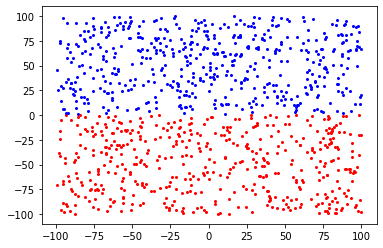

[[-0.92212934 -0.90486696 -0.42130545  0.00799914]
 [ 0.34054503 -0.55213743  0.13596863 -1.36428869]] 

[-0.56470735  1.17015795 -0.2788894   2.17545959] 

0


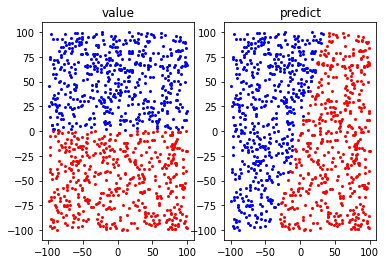

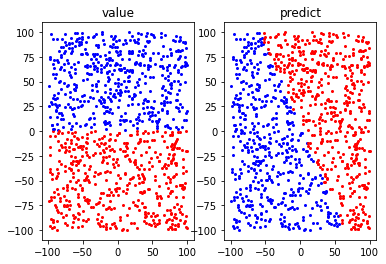

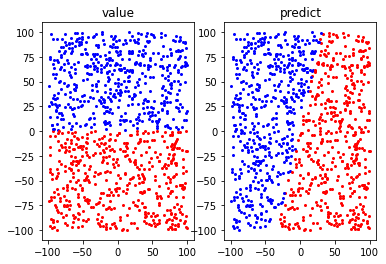

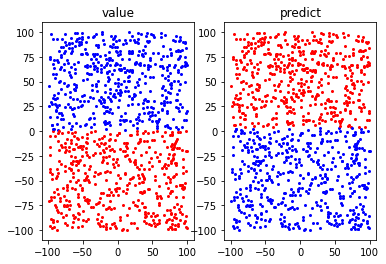

[[-0.02879417  0.31007459]
 [-0.04545546 -0.43007705]
 [ 0.01708001  0.22453557]
 [-0.03503582 -1.67320253]] 

[-1.76557857  4.71483979] 

1


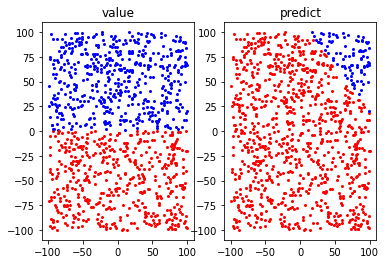

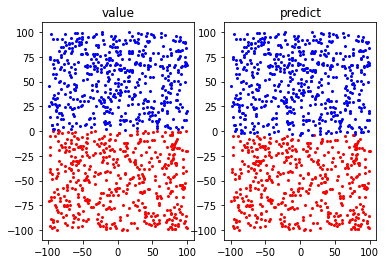

[[-0.55017596]
 [ 2.37912427]] 

[-0.13328276] 

2


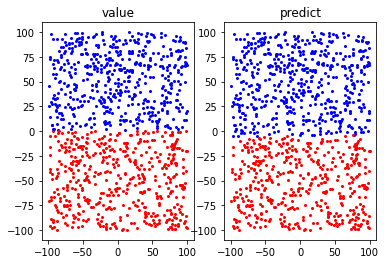

[[2.04193008]] 

[-12.78606745] 

3


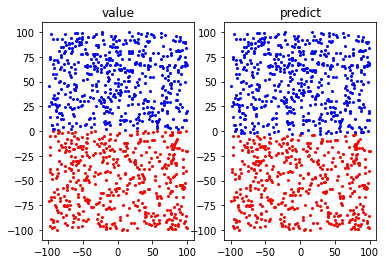

first test
1.0


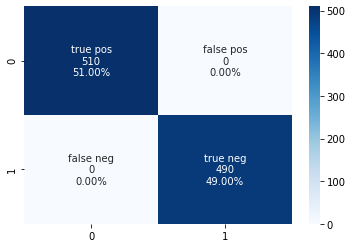

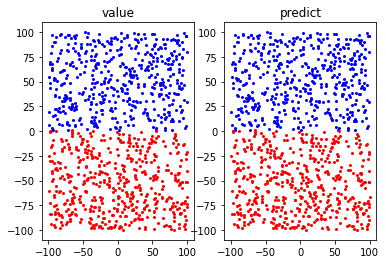

second test
1.0


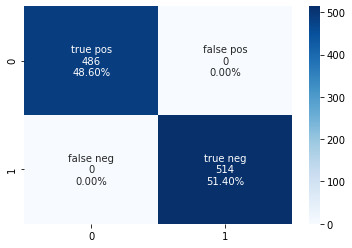

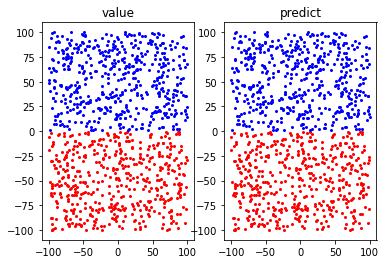

In [9]:
train = build_data_partA(1)
net1=NeuralNetwork(0.1,train,(4,2,1))
net1.fit()
print("plotting train")
plotting_train(train)
lookin(train,net1)

print("first test")
first_test = build_data_partA(9)
test_y=first_test[["value"]]
pred1=net1.predict(first_test)
print(net1.score(first_test,pred1))
con_mat1 = confusion_matrix(pred1,test_y)
confussion_matrix(con_mat1)
plotting_test(first_test)



print("second test")
second_test = build_data_partA(8)
test_y=second_test[["value"]]
pred2=net1.predict(second_test)
print(net1.score(second_test,pred2))
con_mat2 = confusion_matrix(pred2,test_y)
confussion_matrix(con_mat2)
plotting_test(second_test)

In [10]:
# we got good results with 5,2
# 4
# 4 2 1

## part1

In [11]:
# clf = MLPClassifier(solver='lbfgs', alpha=0.1,hidden_layer_sizes=(4,2,1), random_state=1)

In [12]:
# train = build_data_partA(1)
# first_test = build_data_partA(9)
# second_test = build_data_partA(8)
# train.head()

In [13]:
# train_x=train[["x","y"]]
# print(train_x.head())
# train_y=train[["value"]]
# print(train_y.head())

In [14]:
# clf.fit(train_x, train_y)

In [15]:
# test_x=first_test[["x","y"]]
# test_y=first_test[["value"]]

In [16]:
# predicted=clf.predict(test_x)
# first_test["pred"]=predicted
# first_test.head()

In [17]:
# con_mat = confusion_matrix(predicted,test_y )

In [18]:
# confussion_matrix(con_mat)

In [19]:
# plotting_train(train)

In [20]:
# plotting_test(first_test)

In [21]:
# def lookin2(test,lastlayers, weight,bias):              
#     count = 0
#     rlist=[]
#     # for each row we use the activation formula with the weights and bias we returned
#     # in the fit function to predict on the test data set
#     for k in range(len(bias)):
#         pred1 = []
#         predictionlist=[]
#         for j in range(len(test)):
#             prediction=0
#             for i in range(len(lastlayers)):
#                 prediction =prediction+ bias[k] + (lastlayers[i][j] * weight[i][k])
#             predictionlist.append(prediction)
#             if prediction > 0:
#                 prediction = 1
#             else:
#                 prediction = -1
#             pred1.append(prediction)
#     # now add the prediction list to the data set in order to make comparison
#         rlist.append(predictionlist)
#         test1=test.copy()
#         test1['pred']=pred1
#         plotting_test(test1)    
#     return rlist    

In [22]:
# traina = build_data_partA(1)
# weight=clf.coefs_[0]
# bias=clf.intercepts_[0]
# listx=[]
# listy=[]
# for index, row in traina.iterrows():
#     listx.append(row["x"])
#     listy.append(row["y"])
# listt=[listx,listy]
# list1=(lookin2(traina,listt,weight,bias))

In [23]:
# traina = build_data_partA(1)
# weight=clf.coefs_[1]
# bias=clf.intercepts_[1]
# list2=(lookin2(traina,list1,weight,bias))

In [24]:
# traina = build_data_partA(1)
# weight=clf.coefs_[2]
# bias=clf.intercepts_[2]
# list3=(lookin2(traina,list2,weight,bias))

In [25]:
# traina = build_data_partA(1)
# weight=clf.coefs_[3]
# bias=clf.intercepts_[3]
# list4=(lookin2(traina,list3,weight,bias))
# # print(list4)

In [26]:
# def lookin(data):
#     listx=[]
#     listy=[]
#     for index, row in traina.iterrows():
#         listx.append(row["x"])
#         listy.append(row["y"])
#     l=[listx,listy]
#     for i in range(len(clf.coefs_)):
#         datac=data.copy()
#         print(clf.coefs_[i] ,"\n")
#         print(clf.intercepts_[i],"\n")
#         print(i)
# #         print(datac.head())
# #         print(l)
#         l=(lookin2(datac,l,clf.coefs_[i],clf.intercepts_[i]))
        


In [27]:
# traina = build_data_partA(1)
# lookin(traina)

## part2

plotting train


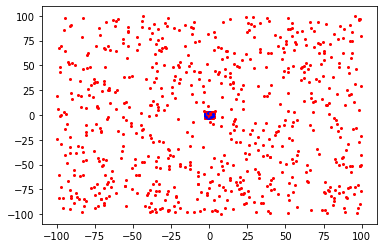

[[-0.1443228   0.38394407 -0.84202141 -0.37331073 -0.61726118]
 [-0.74458916 -0.50779641 -0.24390178 -0.19949634  0.07976641]] 

[-0.14974161  0.34180882 -0.54874989  0.70014796 -0.87568008] 

0


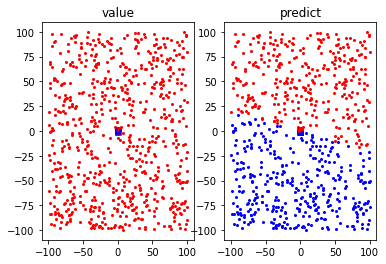

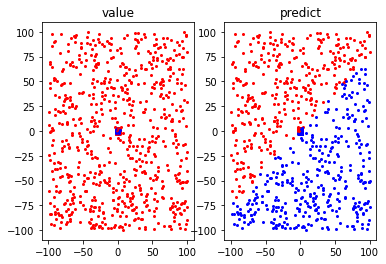

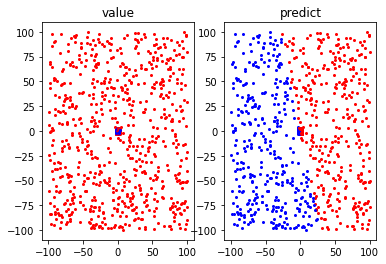

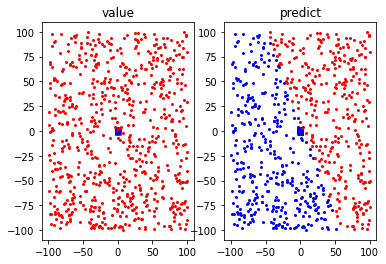

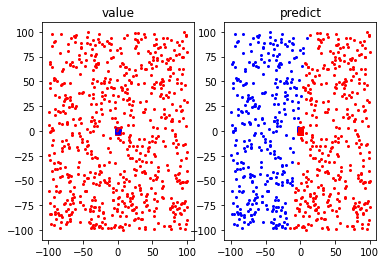

[[ 0.25393539 -0.17674642  0.03563389 -0.58458479]
 [-0.49410733  0.4557645   0.71441678 -0.30329651]
 [ 0.2771382   0.56393937  0.57378999 -0.67438196]
 [-0.76562404 -0.55843773  0.58403304 -0.65292493]
 [-0.14651296  0.71576572  0.01354984  0.31237656]] 

[-0.30169177  0.30329552  0.54466284 -0.7866172 ] 

1


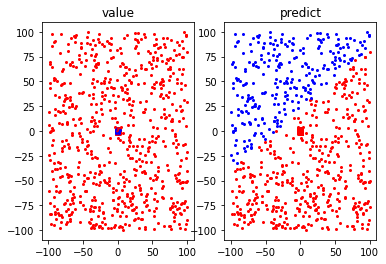

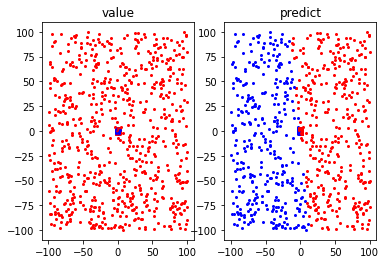

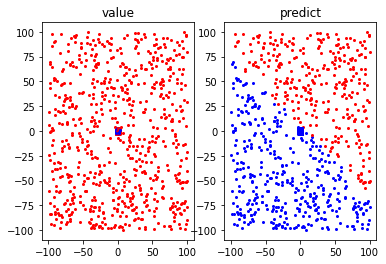

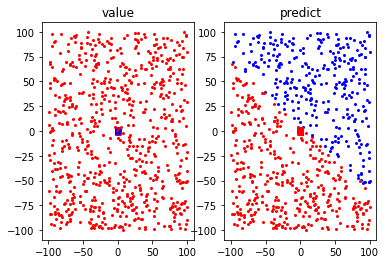

[[ 0.46107856  0.89977835  0.45743139]
 [-0.40469666  0.43978316 -0.73135374]
 [-0.09604527  0.61143671 -0.38042076]
 [-0.39118315 -0.68197868 -0.88592695]] 

[ 0.33113906 -0.53631184 -0.43412323] 

2


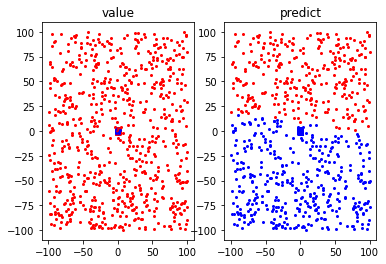

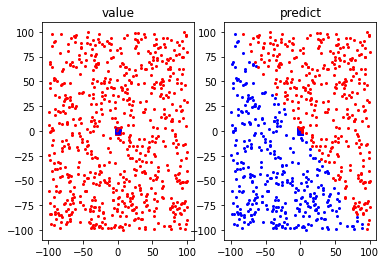

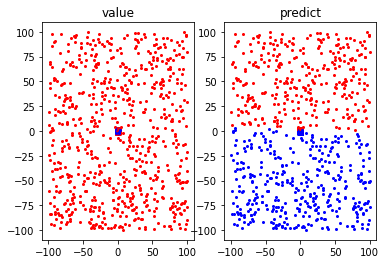

[[-0.01837863 -0.97409979]
 [-0.80629355 -0.77047192]
 [ 0.19477208  0.4356656 ]] 

[-0.88571884 -0.1882939 ] 

3


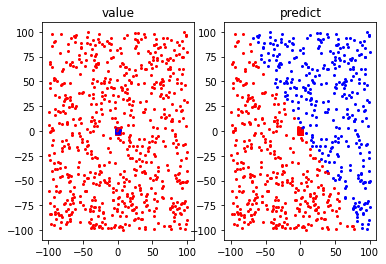

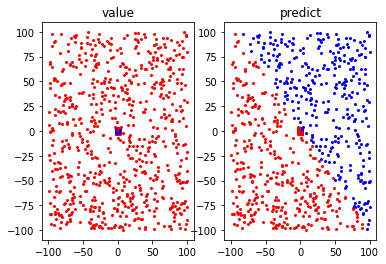

[[ 0.28433911]
 [-0.24163781]] 

[-1.2992534] 

4


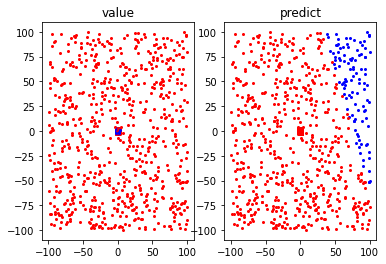

[[-0.77084702]] 

[-1.94636042] 

5


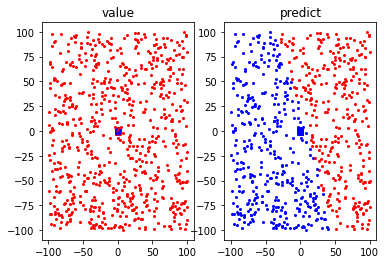

first test
0.87


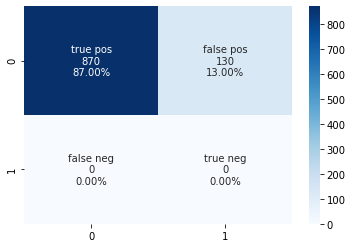

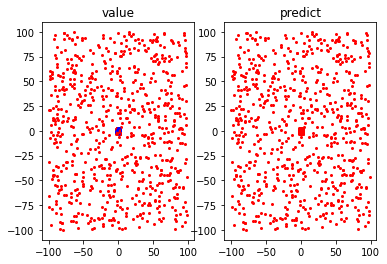

second test
0.867


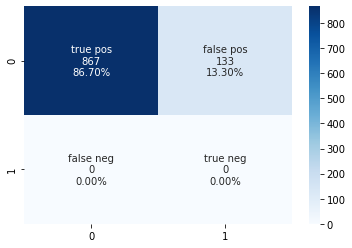

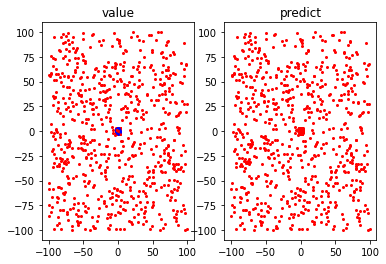

In [40]:
train = build_data_partB(9)
net2=NeuralNetwork(0.1,train,(5,4,3,2))
net2.fit()
print("plotting train")
plotting_train(train)
lookin(train,net2)

print("first test")
first_test = build_data_partB(3)
test_y=first_test[["value"]]
pred1=net2.predict(first_test)
print(net2.score(first_test,pred1))
con_mat1 = confusion_matrix(pred1,test_y)
confussion_matrix(con_mat1)
plotting_test(first_test)



print("second test")
second_test = build_data_partB(7)
test_y=second_test[["value"]]
pred2=net2.predict(second_test)
print(net2.score(second_test,pred2))
con_mat2 = confusion_matrix(pred2,test_y)
confussion_matrix(con_mat2)
plotting_test(second_test)

In [29]:
# trainb = build_data_partB(1)
# first_testb = build_data_partB(9)
# second_testb = build_data_partB(8)
# trainb.head()

In [30]:
# train_xb=trainb[["x","y"]]
# print(train_xb.head())
# train_yb=trainb[["value"]]
# print(train_yb.head())

In [31]:
# clf.fit(train_xb, train_yb)

In [32]:
# test_xb=first_testb[["x","y"]]
# test_yb=first_testb[["value"]]

In [33]:
# predictedb=clf.predict(test_xb)
# first_testb["pred"]=predictedb
# first_testb.head()

In [34]:
# con_matb = confusion_matrix(predictedb,test_yb )

In [35]:
# confussion_matrix(con_matb)

In [36]:
# plotting_train(trainb)

In [37]:
# plotting_test(first_testb)